In [1]:
import pandas as pd
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier

from collections import Counter

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

RANDOM_STATE=4222

In [2]:
df_train = pd.read_csv('./datasets/train.csv')
df_valid = pd.read_csv('./datasets/valid.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
drop = ['Unnamed: 0','title', 'company_profile', 'description', 'requirements', 'benefits',
       'title_tokens', 'company_profile_tokens', 'description_tokens',
       'requirements_tokens', 'benefits_tokens']

In [4]:
df_train.drop(columns=drop, inplace=True)
df_valid.drop(columns=drop, inplace=True)
df_test.drop(columns=drop, inplace=True)

In [5]:
X_train = df_train.drop(columns=['fraudulent']).values
y_train = df_train['fraudulent'].values

X_valid = df_valid.drop(columns=['fraudulent']).values
y_valid = df_valid['fraudulent'].values

X_test = df_test.drop(columns=['fraudulent']).values
y_test = df_test['fraudulent'].values

In [6]:
smote = SMOTE(random_state=RANDOM_STATE, sampling_strategy=0.5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

### Applying XGBoost

In [7]:
model = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=500, early_stopping_rounds=50, eval_metric="rmse")

model.fit(X_train_resampled, y_train_resampled, eval_set=[(X_valid, y_valid)])
y_pred = model.predict(X_test)

[0]	validation_0-rmse:0.46472
[1]	validation_0-rmse:0.43234
[2]	validation_0-rmse:0.40428
[3]	validation_0-rmse:0.37969
[4]	validation_0-rmse:0.35745
[5]	validation_0-rmse:0.36660
[6]	validation_0-rmse:0.35130
[7]	validation_0-rmse:0.33651
[8]	validation_0-rmse:0.34836
[9]	validation_0-rmse:0.33320
[10]	validation_0-rmse:0.31866
[11]	validation_0-rmse:0.30719
[12]	validation_0-rmse:0.29743
[13]	validation_0-rmse:0.28671
[14]	validation_0-rmse:0.27851
[15]	validation_0-rmse:0.26988
[16]	validation_0-rmse:0.26190
[17]	validation_0-rmse:0.25526
[18]	validation_0-rmse:0.24902
[19]	validation_0-rmse:0.24265
[20]	validation_0-rmse:0.23813
[21]	validation_0-rmse:0.23325
[22]	validation_0-rmse:0.22875
[23]	validation_0-rmse:0.22507
[24]	validation_0-rmse:0.23665
[25]	validation_0-rmse:0.24663
[26]	validation_0-rmse:0.24191
[27]	validation_0-rmse:0.23797
[28]	validation_0-rmse:0.23291
[29]	validation_0-rmse:0.22861
[30]	validation_0-rmse:0.23897
[31]	validation_0-rmse:0.25020
[32]	validation_0-

In [8]:
def get_confusion_matrix(actual, predicted, title):
    cf = metrics.confusion_matrix(actual, predicted)
    group_names = ['True Negative','False Positive','False Negative','True Positive'] 
    group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()] 

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    s = sns.heatmap(cf, annot=labels, fmt='', cmap='Blues', xticklabels=['non fraud', 'fraud'], yticklabels=['non fraud', 'fraud'])
    s.set(xlabel='Predictions', ylabel='True Labels', title=title)
    return s

<AxesSubplot: title={'center': 'XGBoost'}, xlabel='Predictions', ylabel='True Labels'>

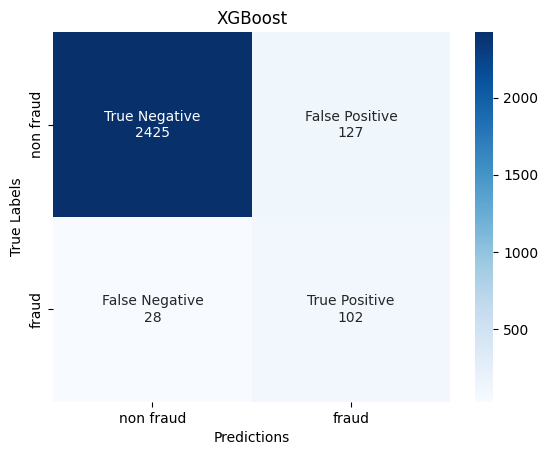

In [9]:
get_confusion_matrix(y_test, y_pred, "XGBoost")

In [10]:
d = {
    'Precision': [metrics.precision_score(y_test,y_pred)],
    'Recall': [metrics.recall_score(y_test,y_pred)],
    'F1-Score': [metrics.f1_score(y_test,y_pred)],
    'Accuracy': [metrics.accuracy_score(y_test,y_pred)],
    'ROC AUC': [metrics.roc_auc_score(y_test,y_pred)],
}

df_metrics = pd.DataFrame(d)
df_metrics

,Precision,Recall,F1-Score,Accuracy,ROC AUC
0,0.445415,0.784615,0.568245,0.942207,0.867425
